In [1]:
import polars as pl

In [2]:
df = pl.read_parquet("ParlaMind.parquet")

In [3]:
df

shape: (404_651, 5)
┌──────────────┬────────────┬───────────┬──────────────┬─────────────────────────────────┐
│ abbreviation ┆ date       ┆ firstName ┆ lastName     ┆ speechContent                   │
│ ---          ┆ ---        ┆ ---       ┆ ---          ┆ ---                             │
│ str          ┆ str        ┆ str       ┆ str          ┆ str                             │
╞══════════════╪════════════╪═══════════╪══════════════╪═════════════════════════════════╡
│ CDU/CSU      ┆ 1980-06-18 ┆ null      ┆ czaja        ┆ Herr Präsident! Meine Damen un… │
│ SPD          ┆ 1988-05-05 ┆ null      ┆ Wieczorek    ┆ Ich möchte jetzt keine Zwische… │
│ CDU/CSU      ┆ 1963-06-19 ┆ null      ┆ diebäcker    ┆ Herr Minister, ist Ihnen bekan… │
│ FDP          ┆ 1984-11-08 ┆ null      ┆ Hamm-Brücher ┆ Herr Staatsminister, ich vermi… │
│ DIE LINKE.   ┆ 2009-05-28 ┆ Monika    ┆ Knoche       ┆ Es sind viele politische und a… │
│ …            ┆ …          ┆ …         ┆ …            ┆ …                               │
│ SPD          ┆ 1956-05-04 ┆ null      ┆ erler        ┆ Wenn Sie vorhin meine Rede geh… │
│ CDU/CSU      ┆ 2020-11-26 ┆ Jan-Marco ┆ Luczak       ┆                                 │
│              ┆            ┆           ┆              ┆                                 │
│              ┆            ┆           ┆              ┆ Selbstverständlich, vom Koll…   │
│ SPD          ┆ 1966-01-26 ┆ null      ┆ Zerbe        ┆ Darf ich Ihrer Antwort demnach… │
│ CDU/CSU      ┆ 2000-01-20 ┆ werner    ┆ lensing      ┆ Frau Präsidentin!               │
│              ┆            ┆           ┆              ┆ Meine sehr v…                   │
│ Grüne        ┆ 1997-10-08 ┆ Uschi     ┆ Eid          ┆ Stimmen Sie mir zu, daß die Au… │
└──────────────┴────────────┴───────────┴──────────────┴─────────────────────────────────┘

In [4]:
df_char = df.with_columns((df["speechContent"].str.len_chars()).alias("speech_char"))

In [5]:
df_char = df_char.with_columns(  
    pl.col("speechContent")
    .map_elements(lambda x: len(x.split()), return_dtype=pl.Int64)
    .alias("speech_words"),
)

In [6]:
df_char.sort("speech_words")

shape: (404_651, 7)
┌──────────────┬────────────┬───────────┬────────────┬────────────────┬─────────────┬──────────────┐
│ abbreviation ┆ date       ┆ firstName ┆ lastName   ┆ speechContent  ┆ speech_char ┆ speech_words │
│ ---          ┆ ---        ┆ ---       ┆ ---        ┆ ---            ┆ ---         ┆ ---          │
│ str          ┆ str        ┆ str       ┆ str        ┆ str            ┆ u32         ┆ i64          │
╞══════════════╪════════════╪═══════════╪════════════╪════════════════╪═════════════╪══════════════╡
│ SPD          ┆ 2011-07-06 ┆ Bettina   ┆ Hagedorn   ┆ null           ┆ null        ┆ null         │
│ DIE LINKE.   ┆ 2010-02-25 ┆ Klaus     ┆ Ernst      ┆ null           ┆ null        ┆ null         │
│ DIE LINKE.   ┆ 2006-11-09 ┆ Ilja      ┆ Seifert    ┆ null           ┆ null        ┆ null         │
│ FDP          ┆ 2012-09-28 ┆ torsten   ┆ staffeldt  ┆ null           ┆ null        ┆ null         │
│ CDU/CSU      ┆ 2005-06-03 ┆ Michael   ┆ Fuchs      ┆ null           ┆ null        ┆ null         │
│ …            ┆ …          ┆ …         ┆ …          ┆ …              ┆ …           ┆ …            │
│ CDU/CSU      ┆ 1981-09-17 ┆ null      ┆ kohl       ┆ Herr           ┆ 74066       ┆ 11010        │
│              ┆            ┆           ┆            ┆ Präsident!     ┆             ┆              │
│              ┆            ┆           ┆            ┆ Meine sehr     ┆             ┆              │
│              ┆            ┆           ┆            ┆ ver…           ┆             ┆              │
│ FDP          ┆ 1955-02-27 ┆ null      ┆ dehler     ┆ Ich habe       ┆ 73118       ┆ 11113        │
│              ┆            ┆           ┆            ┆ unseren        ┆             ┆              │
│              ┆            ┆           ┆            ┆ verehrten Her… ┆             ┆              │
│ CDU/CSU      ┆ 1977-10-05 ┆ null      ┆ strauss    ┆ Herr           ┆ 80071       ┆ 11407        │
│              ┆            ┆           ┆            ┆ Präsident!     ┆             ┆              │
│              ┆            ┆           ┆            ┆ Meine Damen    ┆             ┆              │
│              ┆            ┆           ┆            ┆ un…            ┆             ┆              │
│ SPD          ┆ 1953-10-28 ┆ null      ┆ ollenhauer ┆ Herr           ┆ 85082       ┆ 11457        │
│              ┆            ┆           ┆            ┆ Präsident!     ┆             ┆              │
│              ┆            ┆           ┆            ┆ Meine Damen    ┆             ┆              │
│              ┆            ┆           ┆            ┆ un…            ┆             ┆              │
│ SPD          ┆ 1954-02-04 ┆ null      ┆ schoettle  ┆ Herr           ┆ 81210       ┆ 12058        │
│              ┆            ┆           ┆            ┆ Präsident!     ┆             ┆              │
│              ┆            ┆           ┆            ┆ Meine Damen    ┆             ┆              │
│              ┆            ┆           ┆            ┆ un…            ┆             ┆              │
└──────────────┴────────────┴───────────┴────────────┴────────────────┴─────────────┴──────────────┘

In [8]:
df_char = df_char.filter(df_char["speech_words"] >= 0)
df_char = df_char.with_columns(
    pl.col("date").str.strptime(pl.Date, "%Y-%m-%d").alias("date_parsed"))

In [9]:
df_char = df_char.filter(pl.col("date_parsed") >= pl.date(2005, 11, 22))

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Histogram(x=df_char.select("speech_words").to_series().to_list())])
fig.update_layout(
            title=dict(
                text='Distribution of words in speech (22.11.2005-11.2.2025)'
            ),
            xaxis=dict(
                title=dict(
                    text='words in speech'
                )
            ),
            yaxis=dict(
                title=dict(
                    text='count (log)'
                )
            ),
    )

fig.update_yaxes(type="log")

fig.show()

In [13]:
df_char.median()

shape: (1, 8)
┌─────────────┬──────┬───────────┬──────────┬─────────────┬─────────────┬─────────────┬────────────┐
│ abbreviatio ┆ date ┆ firstName ┆ lastName ┆ speechConte ┆ speech_char ┆ speech_word ┆ date_parse │
│ n           ┆ ---  ┆ ---       ┆ ---      ┆ nt          ┆ ---         ┆ s           ┆ d          │
│ ---         ┆ str  ┆ str       ┆ str      ┆ ---         ┆ f64         ┆ ---         ┆ ---        │
│ str         ┆      ┆           ┆          ┆ str         ┆             ┆ f64         ┆ datetime[m │
│             ┆      ┆           ┆          ┆             ┆             ┆             ┆ s]         │
╞═════════════╪══════╪═══════════╪══════════╪═════════════╪═════════════╪═════════════╪════════════╡
│ null        ┆ null ┆ null      ┆ null     ┆ null        ┆ 3398.0      ┆ 479.0       ┆ 2016-03-17 │
│             ┆      ┆           ┆          ┆             ┆             ┆             ┆ 00:00:00   │
└─────────────┴──────┴───────────┴──────────┴─────────────┴─────────────┴─────────────┴────────────┘

In [14]:
df_char.mean()

shape: (1, 8)
┌─────────────┬──────┬───────────┬──────────┬─────────────┬─────────────┬─────────────┬────────────┐
│ abbreviatio ┆ date ┆ firstName ┆ lastName ┆ speechConte ┆ speech_char ┆ speech_word ┆ date_parse │
│ n           ┆ ---  ┆ ---       ┆ ---      ┆ nt          ┆ ---         ┆ s           ┆ d          │
│ ---         ┆ str  ┆ str       ┆ str      ┆ ---         ┆ f64         ┆ ---         ┆ ---        │
│ str         ┆      ┆           ┆          ┆ str         ┆             ┆ f64         ┆ datetime[m │
│             ┆      ┆           ┆          ┆             ┆             ┆             ┆ s]         │
╞═════════════╪══════╪═══════════╪══════════╪═════════════╪═════════════╪═════════════╪════════════╡
│ null        ┆ null ┆ null      ┆ null     ┆ null        ┆ 3367.053123 ┆ 479.283619  ┆ 2016-01-21 │
│             ┆      ┆           ┆          ┆             ┆             ┆             ┆ 18:39:49.3 │
│             ┆      ┆           ┆          ┆             ┆             ┆             ┆ 34         │
└─────────────┴──────┴───────────┴──────────┴─────────────┴─────────────┴─────────────┴────────────┘

In [17]:
df_char = df_char.with_columns(
    pl.col("date").str.strptime(pl.Date, "%Y-%m-%d").alias("date_parsed")
)

In [20]:
df_char.sort("date_parsed").select(["abbreviation", "date", "firstName", "speechContent", "lastName"])

shape: (404_636, 5)
┌──────────────┬────────────┬───────────┬─────────────────────────────────┬───────────┐
│ abbreviation ┆ date       ┆ firstName ┆ speechContent                   ┆ lastName  │
│ ---          ┆ ---        ┆ ---       ┆ ---                             ┆ ---       │
│ str          ┆ str        ┆ str       ┆ str                             ┆ str       │
╞══════════════╪════════════╪═══════════╪═════════════════════════════════╪═══════════╡
│ KPD          ┆ 1949-09-15 ┆ null      ┆ Ich habe wohl das Recht, auf d… ┆ renner    │
│ CDU/CSU      ┆ 1949-09-15 ┆ null      ┆ Ja.                             ┆ adenauer  │
│              ┆            ┆           ┆                                 ┆           │
│ KPD          ┆ 1949-09-15 ┆ null      ┆ Meine Damen und Herren! In der… ┆ renner    │
│ FDP          ┆ 1949-09-15 ┆ null      ┆ Herr Präsident, meine Damen un… ┆ blücher   │
│ SPD          ┆ 1949-09-15 ┆ null      ┆ Meine Damen und Herren, ich ha… ┆ schmid    │
│ …            ┆ …          ┆ …         ┆ …                               ┆ …         │
│ Fraktionslos ┆ 2025-02-11 ┆ Joana     ┆ Frau Präsidentin! Liebe Bürger… ┆ Cotar     │
│ Fraktionslos ┆ 2025-02-11 ┆ Stefan    ┆ Vielen Dank, Frau Präsidentin.… ┆ Seidler   │
│ SPD          ┆ 2025-02-11 ┆ Axel      ┆ Frau Präsidentin! Liebe Kolleg… ┆ Schäfer   │
│ Grüne        ┆ 2025-02-11 ┆ Katharina ┆ Sehr geehrte Frau Präsidentin!… ┆ Dröge     │
│ SPD          ┆ 2025-02-11 ┆ Lars      ┆ Frau Präsidentin! Liebe Kolleg… ┆ Klingbeil │
└──────────────┴────────────┴───────────┴─────────────────────────────────┴───────────┘

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import polars as pl

def generate_word_cloud_by_politician(df, firstname, lastname):
    df_pol = df.filter((pl.col("lastName") == lastname) & (pl.col("firstName") == firstname)).filter(pl.col("date_parsed") >= pl.date(2024, 11, 7))
    
    all_speeches = " ".join(df_pol.select("speechContent").to_series())
    
    all_speeches = re.sub(r'[^\w\s]', '', all_speeches)
    all_speeches = re.sub(r'\d+', '', all_speeches)
    
    words_politician = word_tokenize(all_speeches.lower())
    
    custom_stopword = {"damen", "herren", "präsident", "präsidentin", "kollegen", "kolleginnen"}
    stop_words = set(stopwords.words('german'))
    stop_words.update(custom_stopword)
    
    word_pol_clean = [word for word in words_politician if word.lower() not in stop_words and len(word) > 1]
    
    word_frequencies = Counter(word_pol_clean)
    
    print(f"{firstname} {lastname}:")
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate_from_frequencies(word_frequencies)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    wordcloud.to_file(f"img/{firstname}_{lastname}.png")
    plt.show()


def generate_word_cloud(df):
    df_pol = df
    
    all_speeches = " ".join(df_pol.select("speechContent").to_series())
    
    all_speeches = re.sub(r'[^\w\s]', '', all_speeches)
    all_speeches = re.sub(r'\d+', '', all_speeches)
    
    words_politician = word_tokenize(all_speeches.lower())
    
    custom_stopword = {"damen", "herren", "präsident", "präsidentin", "kollegen", "kolleginnen"}
    stop_words = set(stopwords.words('german'))
    stop_words.update(custom_stopword)
    
    word_pol_clean = [word for word in words_politician if word.lower() not in stop_words and len(word) > 1]
    
    word_frequencies = Counter(word_pol_clean)
    
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate_from_frequencies(word_frequencies)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    wordcloud.to_file(f"img/wordcloud_all.png")
    plt.show()


In [13]:
candidates = [("Christian", "Lindner"), ("Olaf", "Scholz"), ("Alice", "Weidel"), ("Sahra", "Wagenknecht"), ("Robert", "Habeck"), ("Heidi", "Reichinnek"), ("Friedrich", "Merz")]

Christian Lindner:


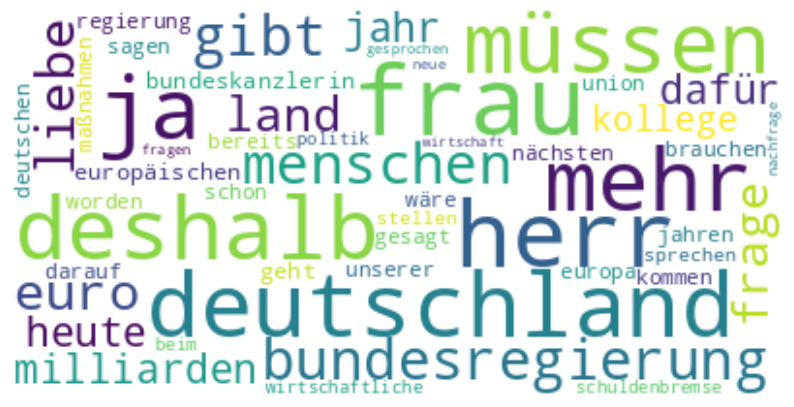

Olaf Scholz:


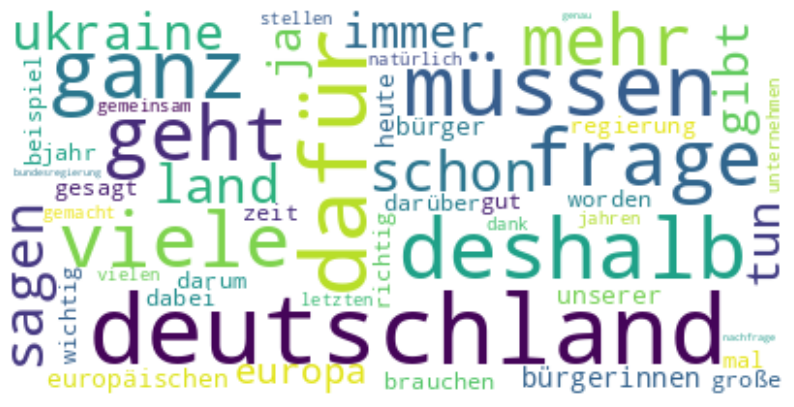

Alice Weidel:


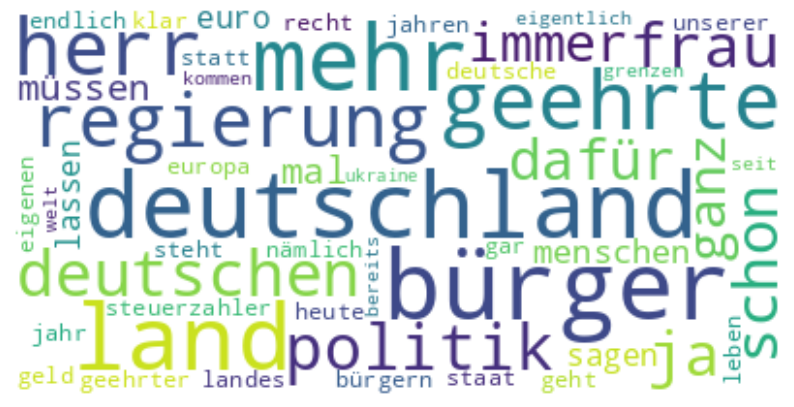

Sahra Wagenknecht:


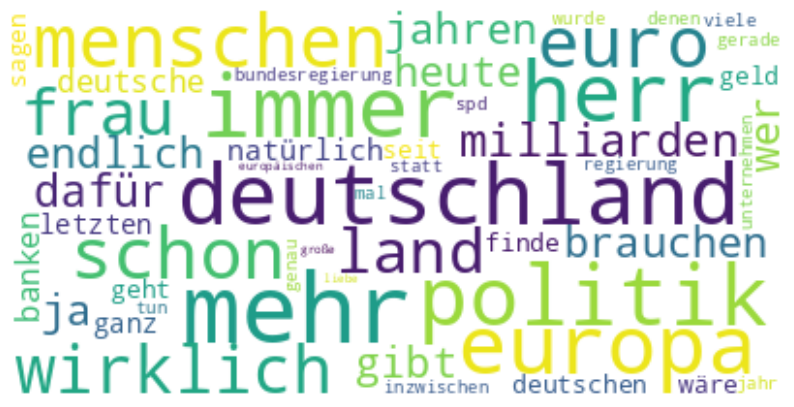

Robert Habeck:


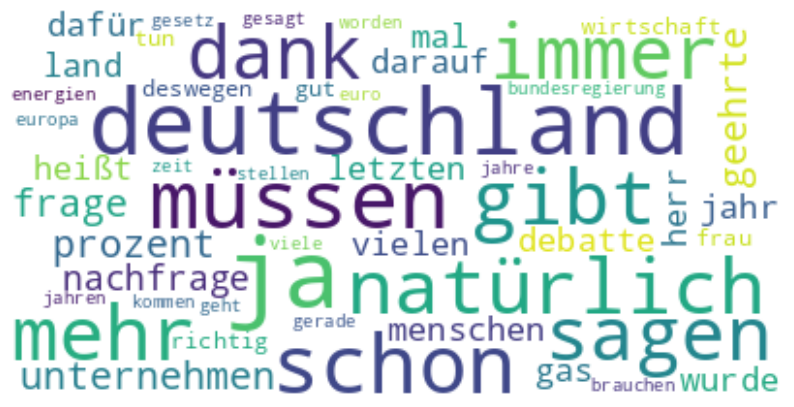

Heidi Reichinnek:


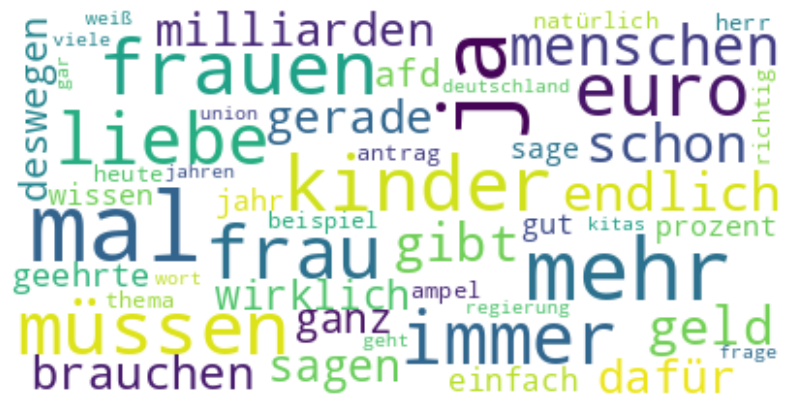

Friedrich Merz:


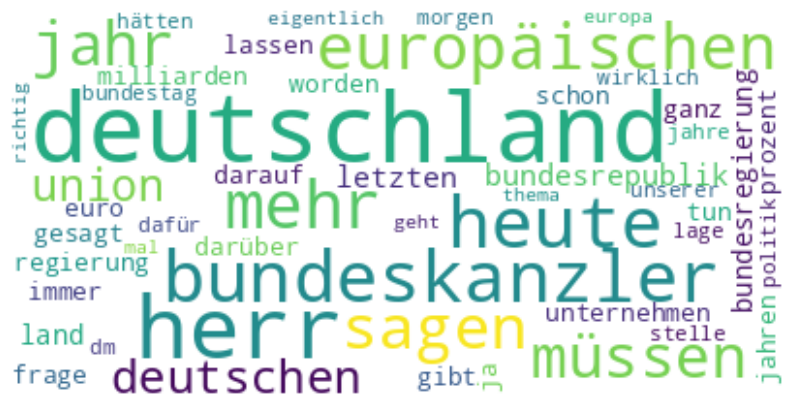

In [24]:
for pol in candidates:
    generate_word_cloud_by_politician(df_char, pol[0], pol[1])

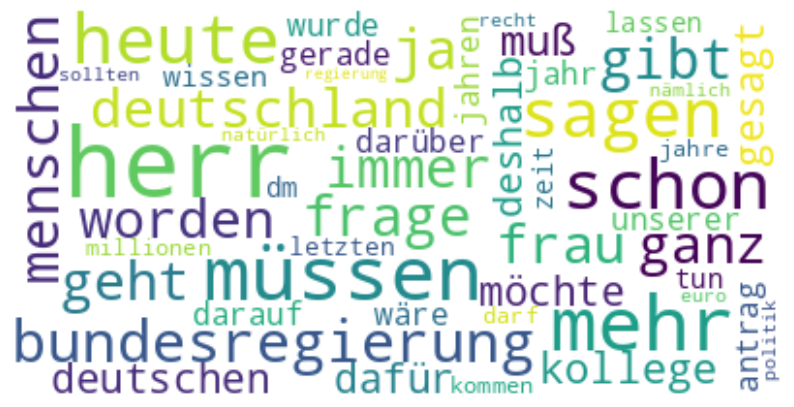

In [30]:
generate_word_cloud(df_char)